In [2]:
library(tidyverse)
library(ggplot2)
library(lubridate)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [3]:
#install.packages("gridExtra")
library(gridExtra)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [4]:
train <- read.csv("train.csv")

In [5]:
train <- read.csv("train.csv")
test <- read.csv("test.csv")

Bike Sharing Demand 의 데이터는 다음과 같다. 이중에서 casual, registered는 test_set에 없어서 사용하지 않을 것이고, 날짜와 날씨 데이터로 이루어져 있다.

datetime: 년-월-일 시간 데이터
season: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
holiday: 공휴일 또는 주말
workingday: 공휴일, 주말을 제외한 평일
weather
1: 매우 맑음(Clear, Few clouds, Partly cloudy, Partly cloudy)
2: 맑음(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
3: 나쁨(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
4: 매우 나쁨(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
temp: 기온
atemp: 체감온도 정도로 보자
humidity: 상대 습도
windspeed: 바람의 세기
casual: 미등록 사용자 렌탈 수
registered: 등록된 사용자 렌탈수
count: 렌탈한 총 합


In [3]:
head(train)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


In [4]:
head(test)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013


In [6]:
summary(train)

                datetime         season         holiday          workingday    
 2011-01-01 00:00:00:    1   Min.   :1.000   Min.   :0.00000   Min.   :0.0000  
 2011-01-01 01:00:00:    1   1st Qu.:2.000   1st Qu.:0.00000   1st Qu.:0.0000  
 2011-01-01 02:00:00:    1   Median :3.000   Median :0.00000   Median :1.0000  
 2011-01-01 03:00:00:    1   Mean   :2.507   Mean   :0.02857   Mean   :0.6809  
 2011-01-01 04:00:00:    1   3rd Qu.:4.000   3rd Qu.:0.00000   3rd Qu.:1.0000  
 2011-01-01 05:00:00:    1   Max.   :4.000   Max.   :1.00000   Max.   :1.0000  
 (Other)            :10880                                                     
    weather           temp           atemp          humidity     
 Min.   :1.000   Min.   : 0.82   Min.   : 0.76   Min.   :  0.00  
 1st Qu.:1.000   1st Qu.:13.94   1st Qu.:16.66   1st Qu.: 47.00  
 Median :1.000   Median :20.50   Median :24.24   Median : 62.00  
 Mean   :1.418   Mean   :20.23   Mean   :23.66   Mean   : 61.89  
 3rd Qu.:2.000   3rd Qu.:26.24

In [5]:
summary(train)

                datetime         season         holiday          workingday    
 2011-01-01 00:00:00:    1   Min.   :1.000   Min.   :0.00000   Min.   :0.0000  
 2011-01-01 01:00:00:    1   1st Qu.:2.000   1st Qu.:0.00000   1st Qu.:0.0000  
 2011-01-01 02:00:00:    1   Median :3.000   Median :0.00000   Median :1.0000  
 2011-01-01 03:00:00:    1   Mean   :2.507   Mean   :0.02857   Mean   :0.6809  
 2011-01-01 04:00:00:    1   3rd Qu.:4.000   3rd Qu.:0.00000   3rd Qu.:1.0000  
 2011-01-01 05:00:00:    1   Max.   :4.000   Max.   :1.00000   Max.   :1.0000  
 (Other)            :10880                                                     
    weather           temp           atemp          humidity     
 Min.   :1.000   Min.   : 0.82   Min.   : 0.76   Min.   :  0.00  
 1st Qu.:1.000   1st Qu.:13.94   1st Qu.:16.66   1st Qu.: 47.00  
 Median :1.000   Median :20.50   Median :24.24   Median : 62.00  
 Mean   :1.418   Mean   :20.23   Mean   :23.66   Mean   : 61.89  
 3rd Qu.:2.000   3rd Qu.:26.24

In [7]:
train_set <- train %>%
select (-registered, -casual) %>%
mutate(
    year = year(datetime),
    month = month(datetime),
    day = day(datetime),
    hour = hour(datetime),
    wday = wday(datetime)
)

In [6]:
train_set <- train %>% 
select (-registered, -casual) %>%
mutate(
    year = year(datetime),
    month = month(datetime),
    day = day(datetime),
    hour = hour(datetime),
    wday = wday(datetime)
)

In [8]:
test_set <- test %>% 
mutate(
    year = year(datetime),
    month = month(datetime),
    day = day(datetime),
    hour = hour(datetime),
    wday = wday(datetime)
)

In [9]:
head(train_set)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,wday
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,7
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,7
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,7
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,7
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,7
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,1,2011,1,1,5,7


In [51]:
fit <- lm(count ~ temp+humidity+hour, data = train_set)
summary(fit)


Call:
lm(formula = count ~ temp + humidity + hour, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-327.54  -97.35  -31.94   53.99  720.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 69.13886    7.11163   9.722   <2e-16 ***
temp         7.86019    0.18605  42.247   <2e-16 ***
humidity    -2.01684    0.07758 -25.996   <2e-16 ***
hour         7.64467    0.21775  35.107   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 149.6 on 10882 degrees of freedom
Multiple R-squared:  0.3183,	Adjusted R-squared:  0.3181 
F-statistic:  1694 on 3 and 10882 DF,  p-value: < 2.2e-16


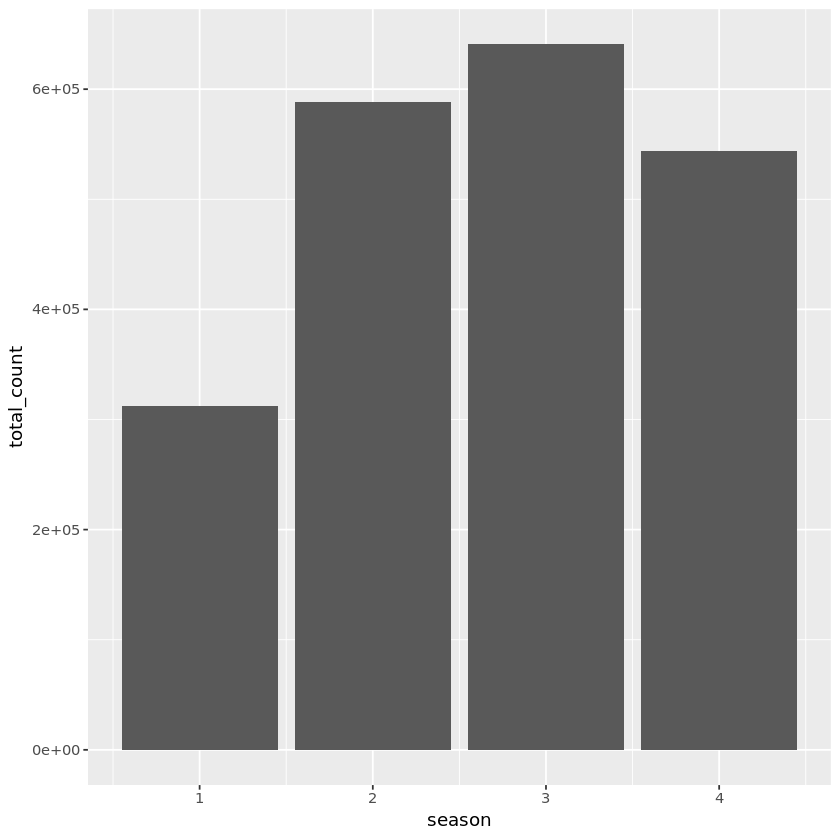

In [32]:
data <- train_set %>%
    group_by(season) %>%
    summarise(
        temp_avg = mean(temp), 
        humi_avg = mean(humidity), 
        total_count = sum(count)) 

ggplot(data, aes(season, total_count)) + geom_bar(stat='identity')

In [11]:
head(train_stat)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,wday
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,7
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,7
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,7
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,7
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,7
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,1,2011,1,1,5,7


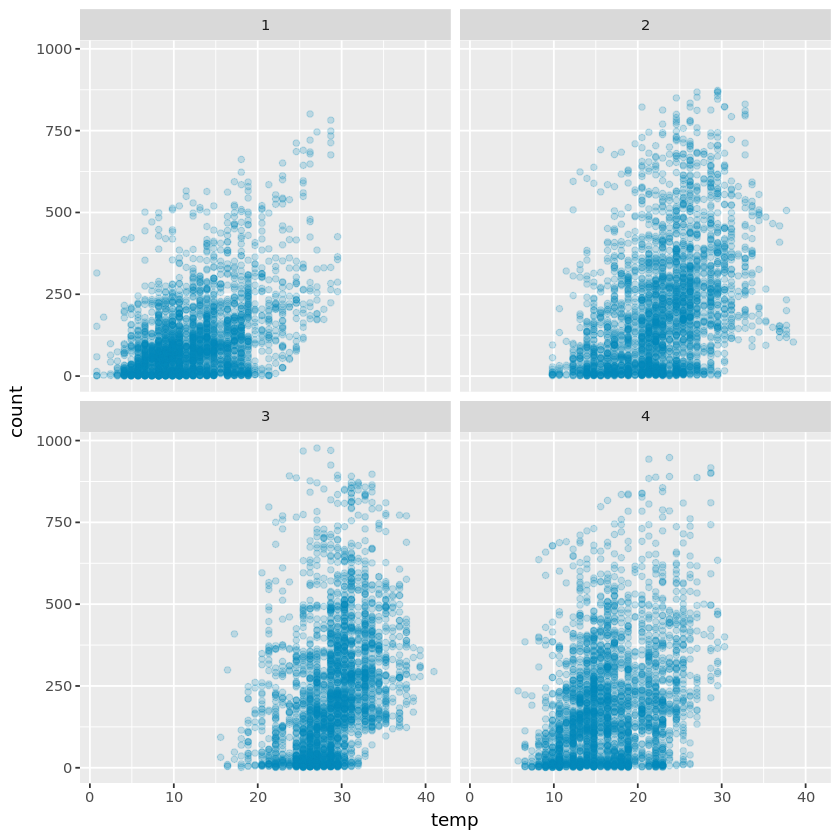

In [58]:
train_set %>%
ggplot(aes(temp,count)) +
geom_point(alpha=.2,color = "#008ABC") + facet_wrap( ~ season)

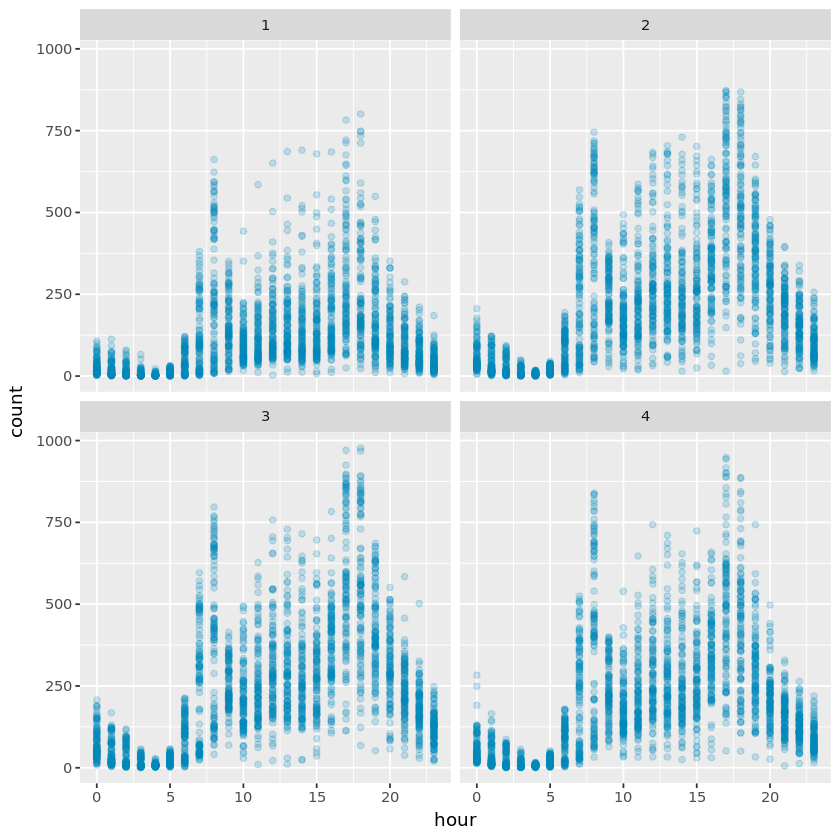

In [54]:
train_set %>%
ggplot(aes(hour,count)) +
geom_point(alpha=.2,color = "#008ABC") + facet_wrap( ~ season)

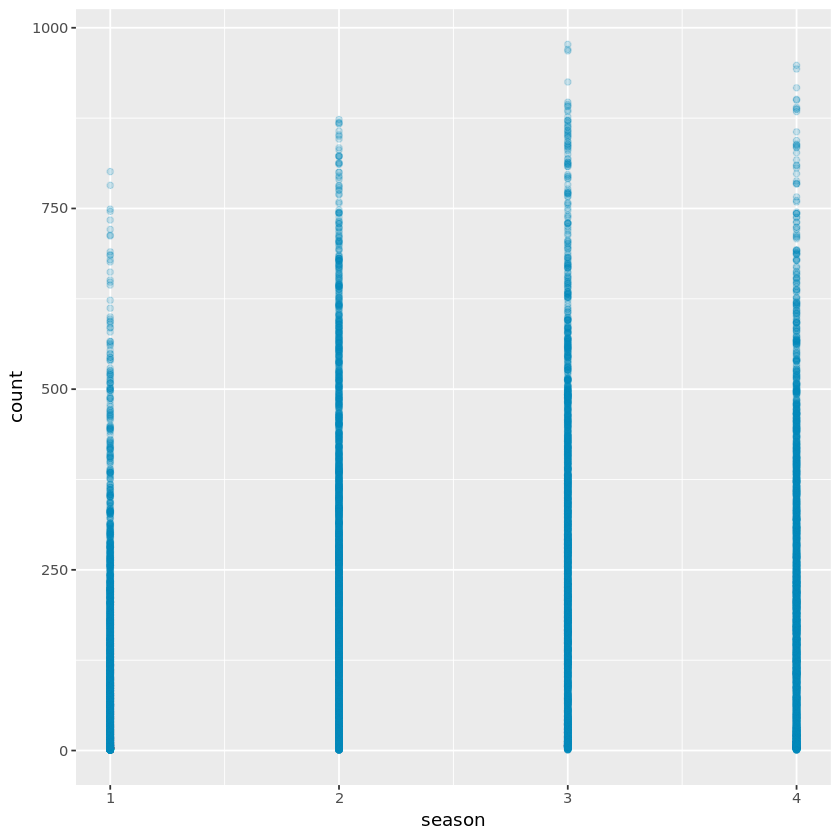

In [10]:
train_set %>%
ggplot(aes(season,count)) +
geom_point(alpha=.2,color = "#008ABC")

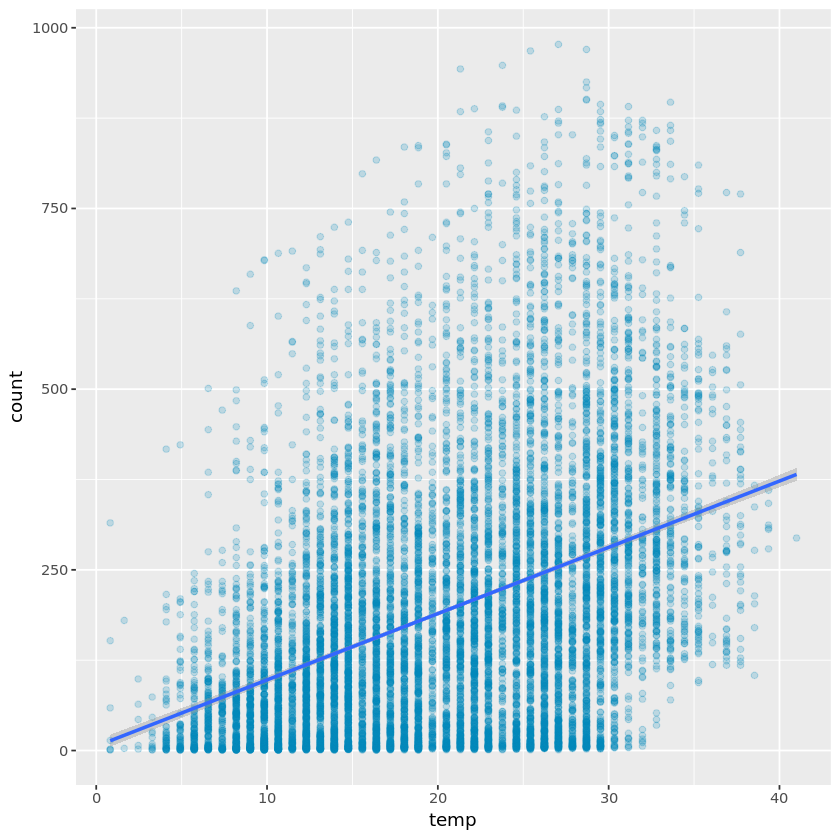

In [19]:
train_set %>%
ggplot(aes(temp,count)) +
geom_point(alpha=.2,color = "#008ABC") + 
geom_smooth(method=lm)

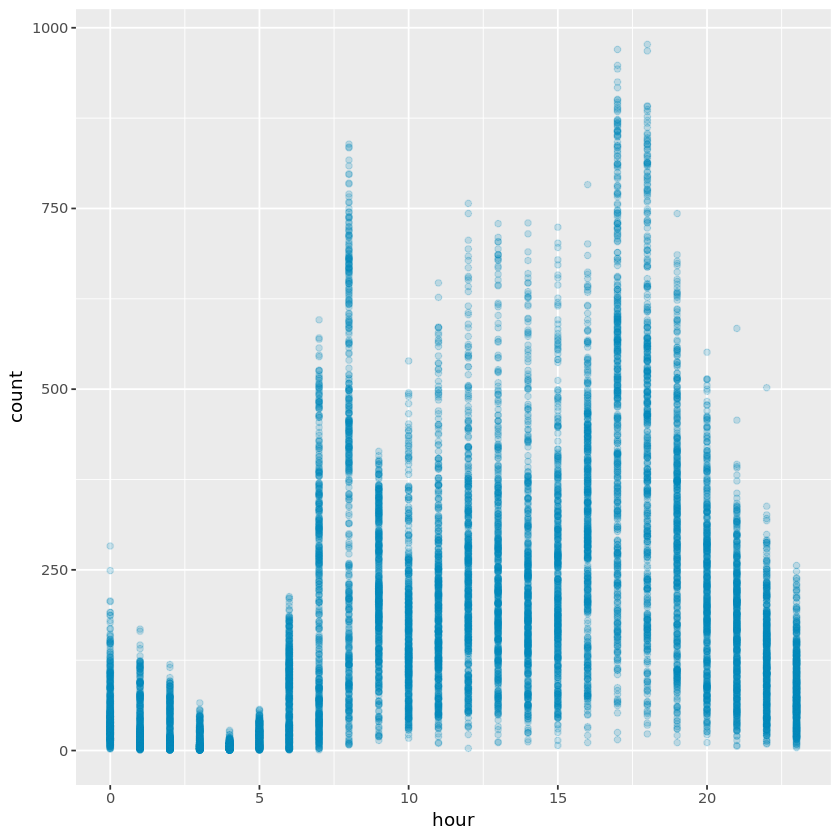

In [12]:
train_set %>%
ggplot(aes(hour,count)) +
geom_point(alpha=.2,color = "#008ABC")

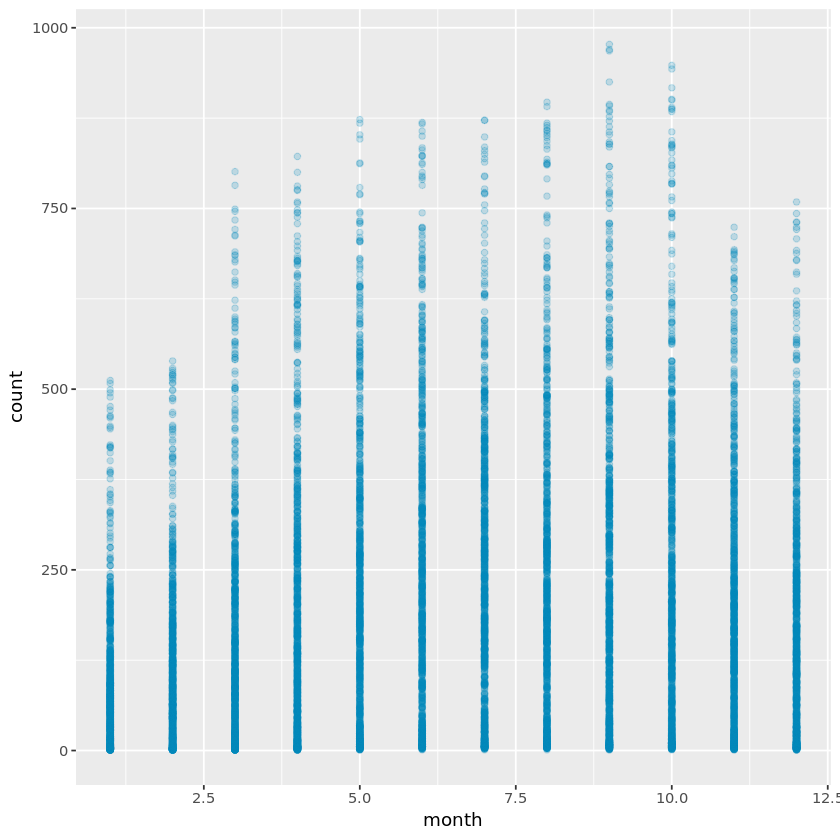

In [13]:
train_set %>%
ggplot(aes(month,count)) +
geom_point(alpha=.2,color = "#008ABC")

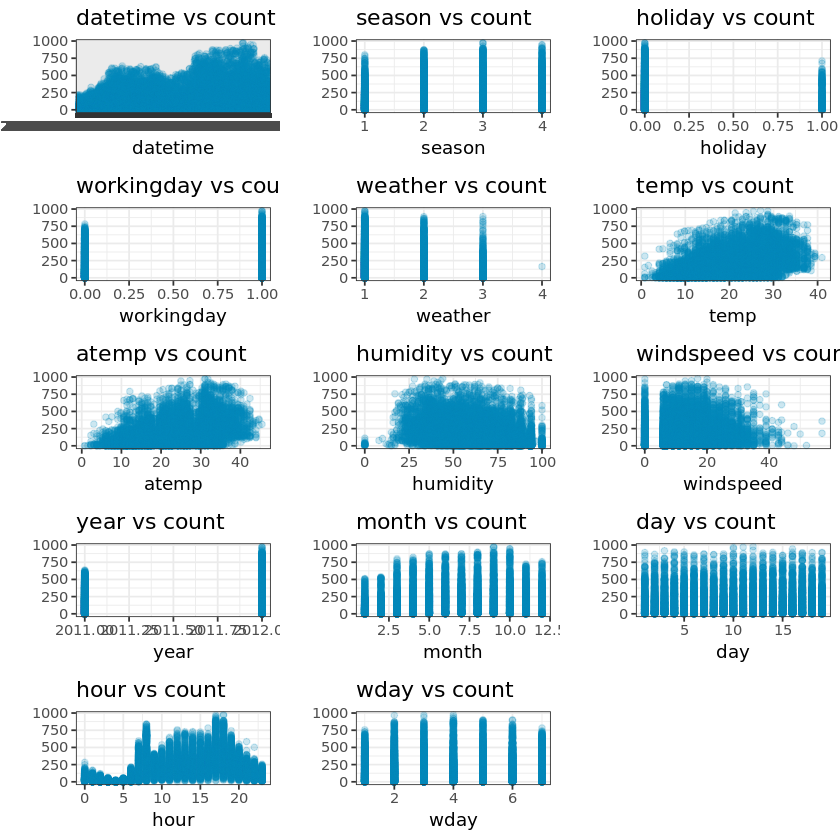

In [18]:
non_hour_list <- (colnames(train_set) != "count")%>%
  which()

lst <- map(non_hour_list, function(i) {
  df_list <- colnames(train_set)[i]
    
train_set %>%
    select(df_list, count) %>%
    rename(aa = df_list) %>%
    ggplot(aes(aa,count)) +
    geom_point(alpha=.2,color = "#008ABC") +
    labs(title = paste0(df_list," vs count"), x = df_list, y = "",color=df_list) +
    theme_bw() +
    theme(legend.position = "bottom")
})

grid.arrange(grobs=lst, ncol=3)

In [ ]:
factor_list <- sapply(train_set, is.factor) %>% 
  which()


lst <- lapply(factor_list, function(x) {
  df_list <- colnames(train_set)[x]
  
  train_set %>% 
    rename(aa = df_list) %>% 
    group_by(aa, hour) %>% 
    summarise(count = sum(count)) %>% 
    ggplot(aes( x = hour, y = count, group = aa, colour = aa)) +
    labs(title = paste0("count by ", df_list), color = df_list) +
    theme_bw() +
    geom_line()
})





grid.arrange(grobs=lst, ncol=2)

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


In [ ]:
yes